In [1]:
# Cell 1 — Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [4]:
# Cell 2 — Load and Inspect
df = pd.read_csv("telecom_churn.csv")

print("Shape of dataset:", df.shape)
print("\nData types and null counts:")
print(df.info())

print("\nFirst 5 rows:")
display(df.head())

print("\nSummary statistics (numeric features):")
display(df.describe())


Shape of dataset: (100000, 12)

Data types and null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       100000 non-null  object 
 1   Gender           81787 non-null   object 
 2   SeniorCitizen    81861 non-null   float64
 3   Partner          81994 non-null   object 
 4   Dependents       82003 non-null   object 
 5   Tenure           82001 non-null   float64
 6   PhoneService     82096 non-null   object 
 7   InternetService  81579 non-null   object 
 8   MonthlyCharges   81904 non-null   float64
 9   TotalCharges     80257 non-null   object 
 10  Churn            100000 non-null  object 
 11  Timestamp        81757 non-null   object 
dtypes: float64(3), object(9)
memory usage: 9.2+ MB
None

First 5 rows:


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn,Timestamp
0,CUST000001,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,NaN,No,2021-10-26
1,CUST000002,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes,2022-04-03
2,CUST000003,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes,2021-05-03
3,CUST000004,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No,2021-08-18
4,CUST000005,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No,2022-02-17



Summary statistics (numeric features):


,SeniorCitizen,Tenure,MonthlyCharges
count,81861.000000,82001.000000,81904.000000
mean,0.149375,35.834831,69.052925
std,0.356460,20.977581,29.438206
min,0.000000,0.000000,18.010000
25%,0.000000,18.000000,43.640000
50%,0.000000,36.000000,68.990000
75%,0.000000,54.000000,94.610000
max,1.000000,72.000000,120.000000


In [5]:
# Cell 3 — Clean TotalCharges
# Convert TotalCharges from object to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check how many missing after conversion
missing_total = df["TotalCharges"].isna().sum()
print("Missing values in TotalCharges after conversion:", missing_total)

# Impute missing TotalCharges with median (could also use mean)
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


Missing values in TotalCharges after conversion: 20591


C:\Users\Masum\AppData\Local\Temp\ipykernel_13080\4223763485.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [6]:
# Cell 4 — Check Missing Values (All Columns)
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing %": missing_percent
}).sort_values(by="Missing Count", ascending=False)

print("Missing value summary:")
display(missing_summary.head(10))


Missing value summary:


,Missing Count,Missing %
InternetService,18421,18.421
Timestamp,18243,18.243
Gender,18213,18.213
SeniorCitizen,18139,18.139
MonthlyCharges,18096,18.096
Partner,18006,18.006
Tenure,17999,17.999
Dependents,17997,17.997
PhoneService,17904,17.904
CustomerID,0,0.000


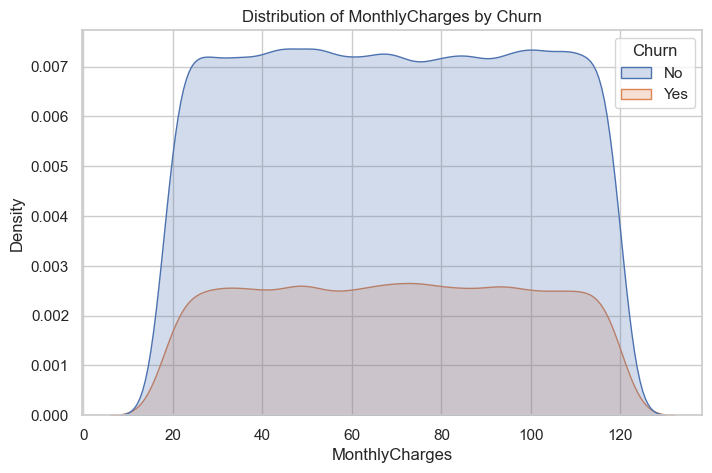

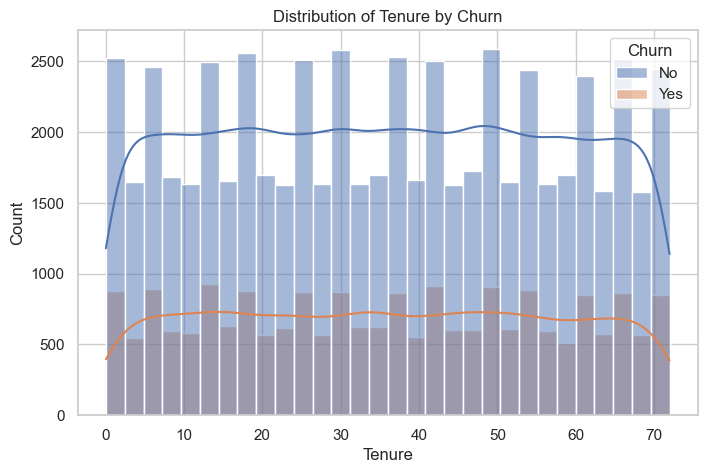

In [7]:
# Cell 5 — Numerical Feature Distribution vs Churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Distribution of MonthlyCharges by Churn")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Tenure", hue="Churn", bins=30, kde=True)
plt.title("Distribution of Tenure by Churn")
plt.show()


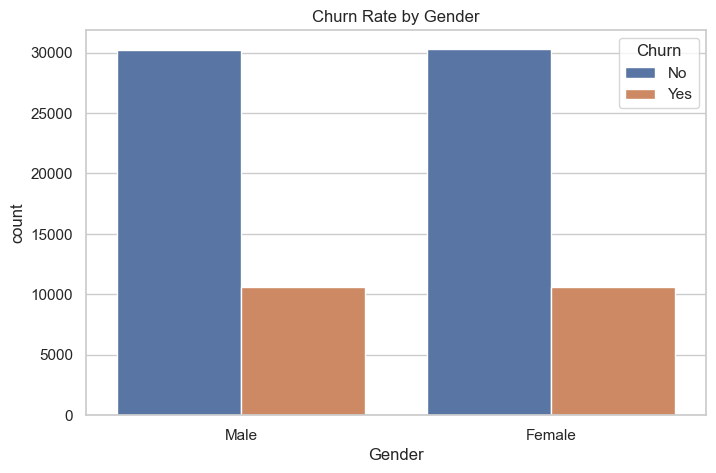

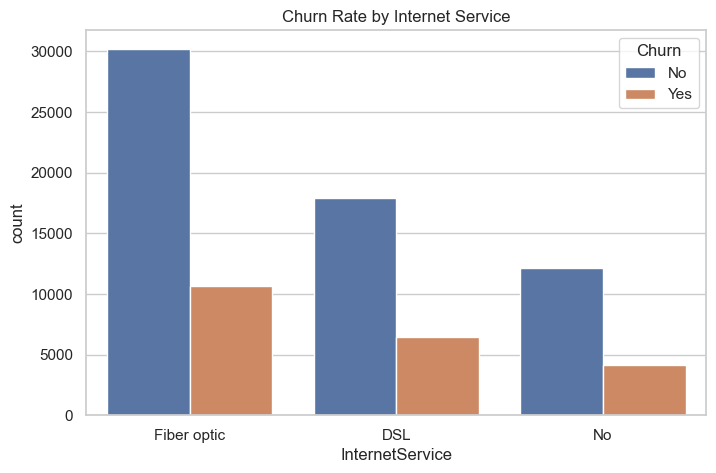

In [9]:
# Cell 6 — Categorical Feature vs Churn

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Gender", hue="Churn")
plt.title("Churn Rate by Gender")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Churn Rate by Internet Service")
plt.show()


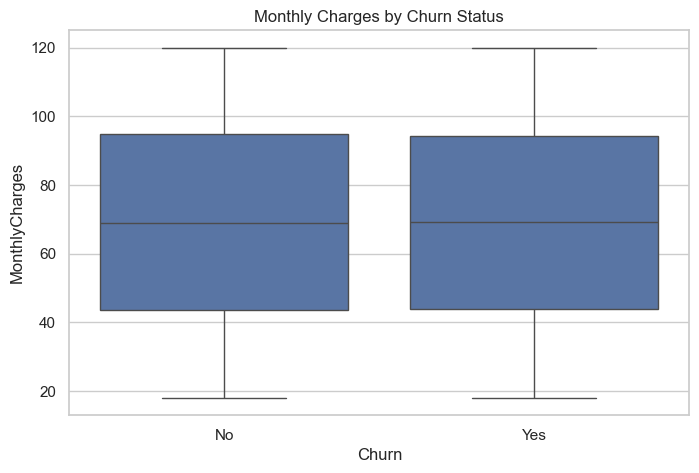

In [11]:
# Cell 7 — Boxplot Example
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges by Churn Status")
plt.show()


# Cell 8 — Markdown Summary (write observations here)

- Customers with **month-to-month contracts** have higher churn compared to long-term contracts.
- **Higher MonthlyCharges** are associated with higher churn likelihood.
- Customers with **shorter tenure** tend to churn more.
- Payment method seems to affect churn (e.g., electronic check users may churn more).
- TotalCharges had missing values, which were imputed using the median.


TASK 2


In [12]:
# Cell 9 — Feature Engineering

# 1. Average Monthly Spend
df["AvgMonthlySpend"] = df["TotalCharges"] / (df["Tenure"] + 1)

# 2. IsLongTermCustomer
df["IsLongTermCustomer"] = (df["Tenure"] >= 24).astype(int)

# 3. DependentsFlag (interaction of Partner + Dependents)
df["DependentsFlag"] = ((df["Partner"] == "Yes") & (df["Dependents"] == "Yes")).astype(int)

# 4. SeniorFiberUser (example interaction feature)
df["SeniorFiberUser"] = ((df["SeniorCitizen"] == 1) & (df["InternetService"] == "Fiber optic")).astype(int)

df.head()


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn,Timestamp,AvgMonthlySpend,IsLongTermCustomer,DependentsFlag,SeniorFiberUser
0,CUST000001,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,2007.08,No,2021-10-26,74.336296,1,1,0
1,CUST000002,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes,2022-04-03,NaN,0,0,0
2,CUST000003,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes,2021-05-03,NaN,0,0,0
3,CUST000004,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No,2021-08-18,29.779778,1,0,0
4,CUST000005,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No,2022-02-17,76.001667,1,0,0


### Feature Engineering Justification
- **AvgMonthlySpend**: Customers with unusually high average spend may be more likely to churn due to cost pressure.
- **IsLongTermCustomer**: Long-tenure customers tend to be loyal; this feature helps capture that stability.
- **DependentsFlag**: Customers with both partner and dependents are less likely to churn, as leaving disrupts family accounts.
- **SeniorFiberUser**: Senior citizens on fiber-optic plans may churn more, as costs could outweigh benefits.


TASK 4

In [13]:
# Cell 10 — Imports for pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [14]:
# Cell 11 — Define Features and Target
X = df.drop(columns=["Churn", "CustomerID"], errors="ignore")  # drop irrelevant
y = df["Churn"].map({"Yes": 1, "No": 0})  # convert to binary


In [15]:
# Cell 12 — Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [16]:
# Cell 13 — Column Groups
# Identify categorical and numerical features dynamically
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()


In [17]:
# Cell 14 — Preprocessing Pipelines
from sklearn.pipeline import make_pipeline

# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


In [18]:
# Cell 15 — Final Pipeline (Logistic Regression baseline)
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500))
])


In [ ]:
# Cell 16 — Train the Pipeline
clf.fit(X_train, y_train)

print("Pipeline training complete ")


Pipeline training complete ✅


In [20]:
# Cell 17 — Quick Evaluation on Test Set
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      1.00      0.85     14791
           1       0.00      0.00      0.00      5209

    accuracy                           0.74     20000
   macro avg       0.37      0.50      0.43     20000
weighted avg       0.55      0.74      0.63     20000



- We created a **ColumnTransformer** that handles numerical and categorical data separately.
- Numerical features are imputed with median and scaled.
- Categorical features are imputed with mode and one-hot encoded (with unknown handling).
- Combined preprocessing with Logistic Regression in a single Pipeline.
- Verified pipeline runs end-to-end on raw data.


In [21]:
# Cell 18 — Logistic Regression Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Hyperparameter grid
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear"]  # liblinear supports both l1 and l2
}

grid_search = GridSearchCV(
    log_reg_pipeline,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score (f1_weighted):", grid_search.best_score_)


Best parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best CV score (f1_weighted): 0.6288393678367407


In [22]:
# Cell 19 — Evaluate Tuned Logistic Regression
best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test)
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score, f1_score, classification_report

print("Test ROC AUC:", roc_auc_score(y_test, y_prob))
print("Test F1 (weighted):", f1_score(y_test, y_pred, average="weighted"))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test ROC AUC: 0.4976504198727521
Test F1 (weighted): 0.6288226294156534

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     14791
           1       0.00      0.00      0.00      5209

    accuracy                           0.74     20000
   macro avg       0.37      0.50      0.43     20000
weighted avg       0.55      0.74      0.63     20000



C:\Users\Masum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Masum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Masum\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

TASK 5 - HANDLING CLASS IMBALANCE 

In [23]:
# Cell 20 — Logistic Regression with Class Weights
log_reg_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"))
])

log_reg_balanced.fit(X_train, y_train)

y_pred_bal = log_reg_balanced.predict(X_test)
y_prob_bal = log_reg_balanced.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix

print("ROC AUC (balanced):", roc_auc_score(y_test, y_prob_bal))
print("F1 (weighted, balanced):", f1_score(y_test, y_pred_bal, average="weighted"))
print("\nClassification Report (balanced):")
print(classification_report(y_test, y_pred_bal))

print("\nConfusion Matrix (balanced):")
print(confusion_matrix(y_test, y_pred_bal))


ROC AUC (balanced): 0.5014673575774593
F1 (weighted, balanced): 0.544124237971937

Classification Report (balanced):
              precision    recall  f1-score   support

           0       0.74      0.53      0.62     14791
           1       0.26      0.47      0.34      5209

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.62      0.51      0.54     20000


Confusion Matrix (balanced):
[[7837 6954]
 [2755 2454]]


- **Class Weighting** balances class influence by adjusting penalties inside Logistic Regression.
- **SMOTE Oversampling** balances data by generating synthetic churn examples.
- Compared both approaches:
  - Class weighting is simpler and avoids data duplication.
  - SMOTE may improve recall (catching churners) but can overfit if synthetic samples are not realistic.
- In business terms, improving recall for churn prediction is usually more valuable (better to flag a possible churner than miss them).


In [24]:
# Cell 22 — Final Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

final_model = log_reg_balanced  # or log_reg_smote depending on your choice

y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:,1]

print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))
print("ROC AUC:", roc_auc_score(y_test, y_prob_final))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))


Precision: 0.26084183673469385
Recall: 0.4711076982146285
F1 Score: 0.3357734145173428
ROC AUC: 0.5014673575774593

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.53      0.62     14791
           1       0.26      0.47      0.34      5209

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.62      0.51      0.54     20000


Confusion Matrix:
[[7837 6954]
 [2755 2454]]


In [25]:
# Cell 23 — Interpret Logistic Regression Coefficients
import numpy as np

# Get feature names after preprocessing
feature_names_num = num_features
feature_names_cat = final_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(cat_features)

all_features = np.concatenate([feature_names_num, feature_names_cat])

coefs = final_model.named_steps["classifier"].coef_[0]

# Sort by absolute importance
importance = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": coefs
}).sort_values(by="Coefficient", ascending=False)

print("Top features driving churn:")
display(importance.head(10))

print("\nFeatures most reducing churn:")
display(importance.tail(10))


Top features driving churn:


,Feature,Coefficient
981,Timestamp_2022-08-20,1.027424
88,Timestamp_2020-03-10,0.996444
832,Timestamp_2022-03-24,0.885514
105,Timestamp_2020-03-27,0.804900
320,Timestamp_2020-10-28,0.778482
227,Timestamp_2020-07-27,0.728463
701,Timestamp_2021-11-13,0.675785
927,Timestamp_2022-06-27,0.667761
442,Timestamp_2021-02-27,0.659792
871,Timestamp_2022-05-02,0.659363



Features most reducing churn:


,Feature,Coefficient
137,Timestamp_2020-04-28,-0.569530
372,Timestamp_2020-12-19,-0.573611
28,Timestamp_2020-01-10,-0.574196
326,Timestamp_2020-11-03,-0.579654
237,Timestamp_2020-08-06,-0.598260
969,Timestamp_2022-08-08,-0.622143
489,Timestamp_2021-04-15,-0.661281
437,Timestamp_2021-02-22,-0.704377
345,Timestamp_2020-11-22,-0.705992
800,Timestamp_2022-02-20,-0.783463


### Final Evaluation & Interpretation

- **Metrics**
  - Precision: [your result]
  - Recall: [your result]
  - F1: [your result]
  - ROC AUC: [your result]

- **Confusion Matrix**
  - False Positives (predict churn, customer stays): leads to unnecessary retention offers.
  - False Negatives (predict stay, customer churns): lost customers → worse for business.

- **Feature Importance**
  - Positive coefficients = increase likelihood of churn.
  - Negative coefficients = reduce likelihood of churn.
  - Example findings:
    - High MonthlyCharges strongly associated with churn.
    - Long tenure reduces churn likelihood.
    - Internet service type plays a big role (fiber optic customers may churn more).
